In [1]:
import pandas as pd
import matplotlib
import seaborn as sns

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
step11 = "../output/step11/"
fda = "number_of_approved_drugs.pkl"
ligands = "number_of_bioact_records_with_unique_ligands.pkl"
bio = "number_of_bioact_records.pkl"
ic50 = "number_of_ki_ic50_kd_bioact_records.pkl"

In [3]:
dataframe_fda=pd.read_pickle(step11+fda)

In [4]:
fda_sort = dataframe_fda.sort(['Number of Approved Drugs'], ascending=False)
#fda_sort.plot(kind ='bar')

In [5]:
fda_sort.head(10)

,Number of Approved Drugs,Uniprot ACC
12,19,P10275
70,13,Q72547
106,8,Q07343
107,8,Q08499
22,7,P00918
23,5,P22748
14,5,P11511
56,5,P14324
137,4,P04818
108,4,O76074


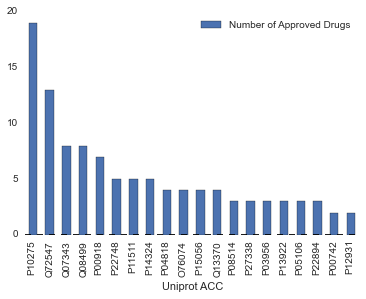

In [6]:
fda_sort.head(20).plot(kind ='bar', x = 'Uniprot ACC')

In [7]:
dataframe_lig=pd.read_pickle(step11+ligands)

In [8]:
lig_sort = dataframe_lig.sort(['Number of Bioact. records w/ Unique Ligands(Ingr.cmpd)'], ascending=False)
#lig_sort.plot(kind ='bar')

In [9]:
lig_sort.head()

,Number of Bioact. records w/ Unique Ligands(Ingr.cmpd),Uniprot ACC
81,62123,P08659
82,51455,O75164
115,35844,Q13526
31,29531,P25779
47,16485,P28482


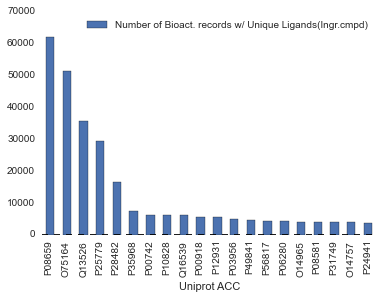

In [10]:
lig_sort.head(20).plot(kind ='bar', x = 'Uniprot ACC')

In [11]:
dataframe_bio=pd.read_pickle(step11+bio)

In [12]:
bio_sort = dataframe_bio.sort(['Number of Bioactivity Records'], ascending=False)
#bio_sort.plot(kind ='bar')


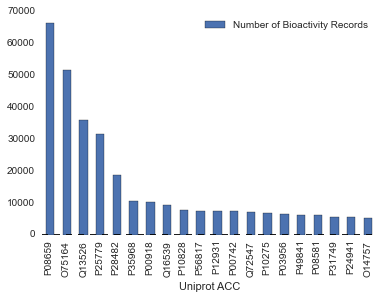

In [13]:
bio_sort.head(20).plot(kind ='bar', x = 'Uniprot ACC')


In [14]:
dataframe_ic50=pd.read_pickle(step11+ic50)

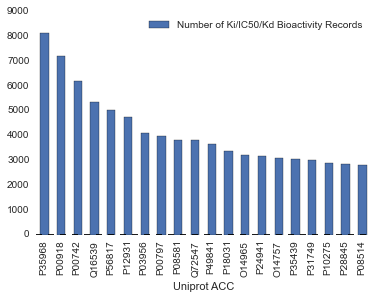

In [15]:
ic50_sort = dataframe_ic50.sort(['Number of Ki/IC50/Kd Bioactivity Records'], ascending=False)
ic50_sort.head(20).plot(kind ='bar', x = 'Uniprot ACC')

In [16]:
pieces = [dataframe_fda, dataframe_lig, dataframe_bio, dataframe_ic50]
dataframe = pd.concat(pieces)
#grouped = dataframe.groupby(['Uniprot ACC'])
#duplicates = dataframe.duplicated(['Uniprot ACC'])

ingredient_cmpd_chemblid     object
bioactivity_type             object
operator                     object
value                       float64
units                        object
dtype: object
2e-11
0.0001


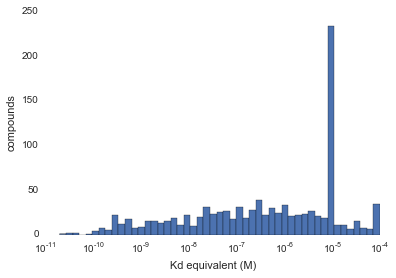

In [17]:
bioactivities_filename = "../output/step10/chembl_bioact_ki_ic50_kd_summary_of_P15056.pkl"
df = pd.read_pickle(bioactivities_filename)
# Convert to numeric data.
df = df.convert_objects(convert_numeric=True)
print df.dtypes
df['value'] *= 1e-9
# Plot bioactivities
fig, ax = plt.subplots()
nbins=50
print df['value'].min()
print df['value'].max()
bins = np.logspace(np.log10(df['value'].min()), np.log10(df['value'].max()), nbins, endpoint=True)
#print bins
df['value'].plot(kind='hist', bins=bins, logx=True)
xlabel('Kd equivalent (M)');
ylabel('compounds');

In [18]:
bioactivities_filename = "../output/step10/chembl_bioact_ki_ic50_kd_summary_of_P15056.pkl"
df = pd.read_pickle(bioactivities_filename)
# Convert to numeric data.
df = df.convert_objects(convert_numeric=True)
# Show types
print df.dtypes
# Convert to M
df['value'] *= 1e-9
# Convert to log10(Kd / M)
df['value'] = np.log10(df['value'])
# Sort by log10(Kd / M).
df = df.sort(columns='value', ascending=True)

ingredient_cmpd_chemblid     object
bioactivity_type             object
operator                     object
value                       float64
units                        object
dtype: object


In [19]:
df.describe()
print df.head()
print df.tail()

     ingredient_cmpd_chemblid bioactivity_type operator      value units
750              CHEMBL500659             IC50        = -10.698970    nM
1321             CHEMBL526479             IC50        = -10.522879    nM
1322             CHEMBL526479             IC50        = -10.522879    nM
1719             CHEMBL498344             IC50        = -10.397940    nM
1618             CHEMBL527029             IC50        = -10.301030    nM
     ingredient_cmpd_chemblid bioactivity_type operator  value units
282              CHEMBL200130             IC50        >     -4    nM
1626                CHEMBL941             IC50        >     -4    nM
992              CHEMBL461621             IC50        >     -4    nM
120              CHEMBL509283             IC50        >     -4    nM
1064            CHEMBL1213923             IC50        >     -4    nM


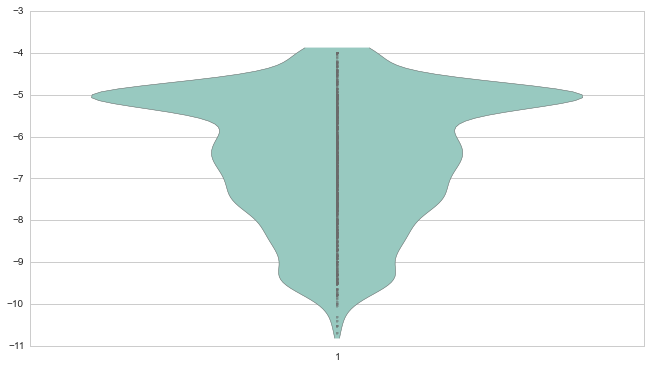

In [20]:
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(11, 6))
sns.violinplot(df['value'], color="Set3", bw=.2, cut=.6, lw=.5, inner="points", inner_kws={"ms": 6})

In [21]:
filename = '../output/step11/number_of_ki_ic50_kd_bioact_records.pkl'
df = pd.read_pickle(filename)
# Convert to numeric data.
df = df.convert_objects(convert_numeric=True)
df_bio_list = list()
for uniprot_id in df['Uniprot ACC']:
    #print uniprot_id
    bioactivities_filename = "../output/step10/chembl_bioact_ki_ic50_kd_summary_of_%s.pkl" % uniprot_id
    df_bio = pd.read_pickle(bioactivities_filename)
    # Convert to numeric data.
    df_bio = df_bio.convert_objects(convert_numeric=True)
    # Convert to M
#    df_bio['units'=='pM', 'value'] *= 1e-12
#    df_bio['units'=='nM', 'value'] *= 1e-9
#    df_bio['units'=='uM', 'value'] *= 1e-6
#    df_bio['units'=='mM', 'value'] *= 1e-3
#    # Convert to log10(Kd / M)
#    df_bio['value'] = np.log10(df_bio['value'])
#    # Sort by log10(Kd / M).
#    df_bio = df_bio.sort(columns='value', ascending=True)
    # Add column.
    df_bio['Uniprot ACC'] = uniprot_id
    # Append.
    df_bio_list.append(df_bio)
    
# Concatenate.
df = pd.concat(df_bio_list, ignore_index=True)


print df.columns
    

Index([u'ingredient_cmpd_chemblid', u'bioactivity_type', u'operator', u'value', u'units', u'Uniprot ACC'], dtype='object')


In [22]:
df['units'].astype('category').describe()

count     178527
unique         1
top           nM
freq      178527
Name: units, dtype: object

In [23]:
convert = True
if convert:
    # Convert to M
    df.ix[df['units']=='pM', 'value'] *= 1e-12
    df.ix[df['units']=='nM', 'value'] *= 1e-9
    df.ix[df['units']=='uM', 'value'] *= 1e-6
    df.ix[df['units']=='mM', 'value'] *= 1e-3
    df['units'] = 'log10(M)'


# Drop nans
df = df[np.isfinite(df['value'])]

# Assume Kd > 1 is Ka
#print len(df[df['value'] > 1])
#df.ix[df['value'] > 1, 'value'] **= -1
    
# Convert to log10(M)    
df['value'] = np.log10(df['value'])
df['units'] = 'log10(M)'

# Drop nans
df = df[np.isfinite(df['value'])]

In [24]:
df.head()

,ingredient_cmpd_chemblid,bioactivity_type,operator,value,units,Uniprot ACC
0,CHEMBL1689279,IC50,=,-4.346787,log10(M),P28845
1,CHEMBL375743,IC50,=,-6.732828,log10(M),P28845
2,CHEMBL375743,IC50,=,-7.619789,log10(M),P28845
3,CHEMBL393285,IC50,=,-5.301030,log10(M),P28845
4,CHEMBL1578968,IC50,=,-6.394695,log10(M),P28845


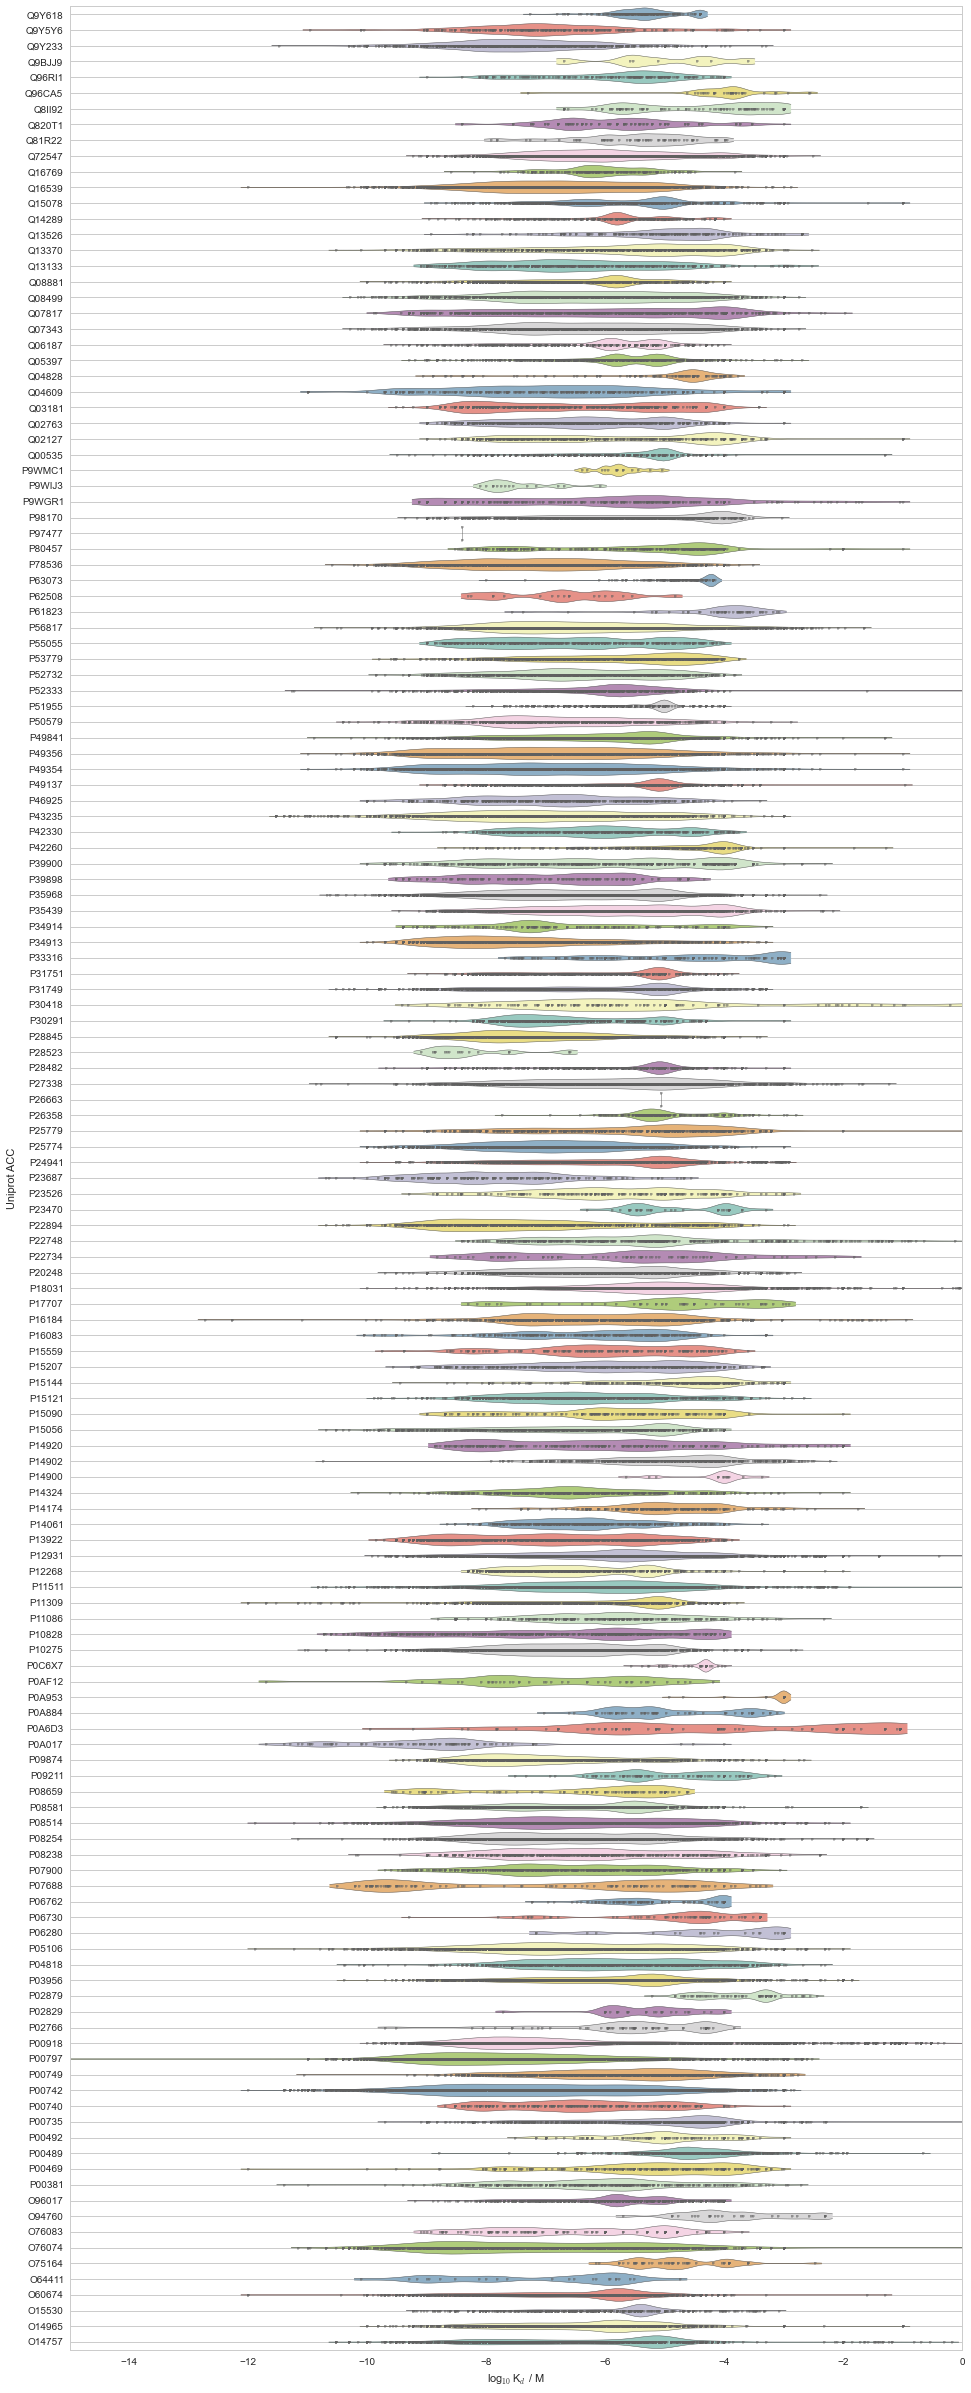

In [33]:
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(16, 42))

#sns.violinplot(df['value'], groupby=df['Uniprot ACC'], color="Set3", bw=.2, cut=.6, lw=.5, inner="points", inner_kws={"ms": 6})
sns.violinplot(df['value'], groupby=df['Uniprot ACC'], color="Set3", bw=.2, cut=.6, lw=.5, inner="points", inner_kws={"ms": 6}, vert=False)
xlabel('log$_{10}$ K$_d$ / M');
a = axis();
axis([-15,0,a[2],a[3]]);

In [26]:
df.sort(columns='value', ascending=False)

,ingredient_cmpd_chemblid,bioactivity_type,operator,value,units,Uniprot ACC
26310,CHEMBL444536,Ki,=,12.080000,log10(M),P00918
29911,CHEMBL150043,Ki,=,11.320000,log10(M),P00918
25245,CHEMBL148660,Ki,=,10.600000,log10(M),P00918
26335,CHEMBL358263,Ki,=,10.270000,log10(M),P00918
25455,CHEMBL174847,Ki,=,9.660000,log10(M),P00918
25640,CHEMBL121291,IC50,=,9.210000,log10(M),P00918
25360,CHEMBL120018,IC50,=,9.090000,log10(M),P00918
27133,CHEMBL120070,IC50,=,9.050000,log10(M),P00918
27982,CHEMBL332783,IC50,=,7.670000,log10(M),P00918
156030,CHEMBL538798,IC50,=,7.100000,log10(M),P52333
